In [1]:


#import functions and libraries

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
%matplotlib inline 




In [2]:

#importing github raw with csb file for TSLA

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv"

df = pd.read_csv(url, sep=',')
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2021-10-08,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2021-10-11,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2021-10-12,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000


In [4]:
x = df[['High','Low','Open','Volume']].values
y = df['Close'].values

In [5]:

#training model

x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
regressor = LinearRegression()

In [7]:
# using linear regression based on previous data
regressor.fit(x_train,y_train)

LinearRegression()

In [8]:
print(regressor.coef_)

[ 9.67526692e-01  6.62921370e-01 -6.34627090e-01 -5.28288450e-09]


In [9]:
print(regressor.intercept_)

0.10122765785403942


In [10]:
predicted = regressor.predict(x_test)

In [11]:


# making a dframe to check actual vs predicted results
dframe = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predicted.flatten()})

In [12]:
dframe.head(20)

,Actual,Predicted
0,38.436001,38.610541
1,673.580017,664.424655
2,5.582000,5.628072
3,7.094000,7.098933
4,156.376007,160.346724
5,48.243999,47.964242
6,45.001999,45.239484
7,48.556000,48.913865
8,46.464001,46.800102
9,4.592000,4.611518


In [13]:

# checking for difference/error in code

print('Mean Absolute Difference:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Difference:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Difference:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))


Mean Absolute Difference: 0.9653622592148507
Mean Squared Difference: 6.616145787760759
Root Mean Squared Difference: 2.572186965941776


In [14]:
graph = dframe.head(20)

<AxesSubplot:>

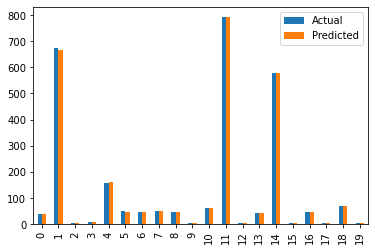

In [15]:
#plotting for actual v predicted

graph.plot(kind='bar')

In [21]:
# setting up for forecast, actual future predictions
forecast_col = 'Adj Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

x = np.array(df.drop(['label'], 1))
x_lately = x[-forecast_out:]
x = x[:-forecast_out]

x = x.flatten('C')


df.dropna(inplace=True)

y = np.array(df['label'])


clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)

forecast_set = clf.predict(x_test) # dummy x value, because other x values fail
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day



for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]


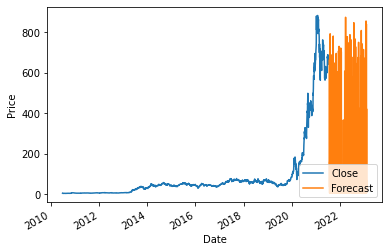

In [20]:
#Failing to show forecast because of incorrect x-values 
#Also missing input values for x prediction so that you can choose a certain date

df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()